<a href="https://colab.research.google.com/github/Bhumika20022/machine-learning-basics-/blob/main/ANN_DRUG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [279]:
# import the necessery libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [280]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [281]:
df = pd.read_csv('/content/drug200.csv')
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [282]:
df.tail()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX
199,40,F,LOW,NORMAL,11.349,drugX


In [283]:
df.shape

(200, 6)

In [284]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [285]:
df.isnull().any()

Age            False
Sex            False
BP             False
Cholesterol    False
Na_to_K        False
Drug           False
dtype: bool

In [286]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [287]:
df.describe() # descriptive statistics

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [288]:
df.BP.unique()

array(['HIGH', 'LOW', 'NORMAL'], dtype=object)

In [289]:
df.BP.value_counts()

HIGH      77
LOW       64
NORMAL    59
Name: BP, dtype: int64

In [290]:
df.Cholesterol.unique()

array(['HIGH', 'NORMAL'], dtype=object)

In [291]:
df.Cholesterol.value_counts()

HIGH      103
NORMAL     97
Name: Cholesterol, dtype: int64

In [292]:
df.Drug.unique()

array(['DrugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

In [293]:
df.Drug.value_counts()

DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

In [294]:
df.Sex.unique()

array(['F', 'M'], dtype=object)

In [295]:
df.Sex.value_counts()

M    104
F     96
Name: Sex, dtype: int64

In [296]:
df.corr()

<ipython-input-296-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Age,Na_to_K
Age,1.000000,-0.063119
Na_to_K,-0.063119,1.000000


VISUALISATION 

In [297]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


<ipython-input-298-b2378c9d8a20>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Age)


<Axes: xlabel='Age', ylabel='Density'>

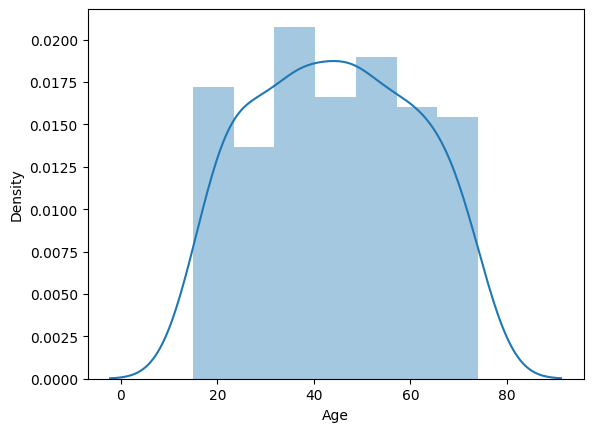

In [298]:
sns.distplot(df.Age)

<ipython-input-299-fda53b94c691>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Na_to_K)


<Axes: xlabel='Na_to_K', ylabel='Density'>

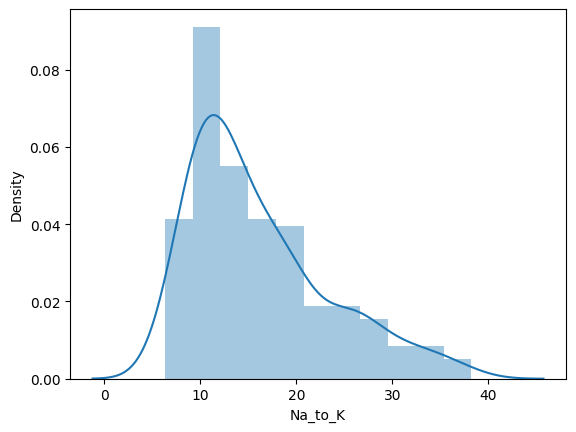

In [299]:
sns.distplot(df.Na_to_K)

<ipython-input-300-8451b8490161>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot =True)


<Axes: >

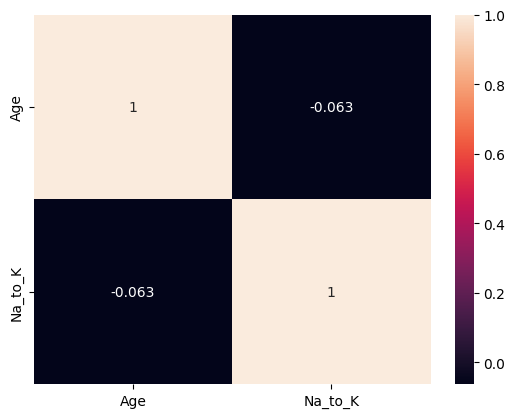

In [300]:
sns.heatmap(df.corr(),annot =True)

<Axes: >

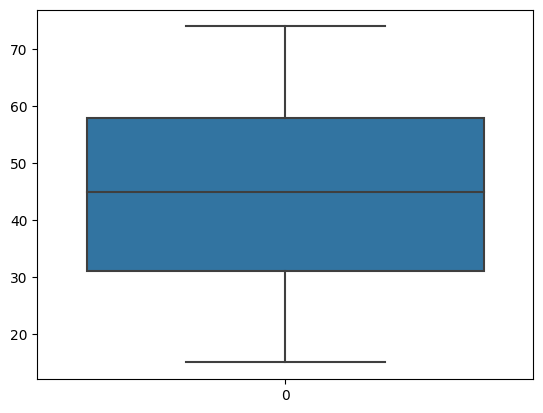

In [301]:
sns.boxplot(df.Age)

<Axes: >

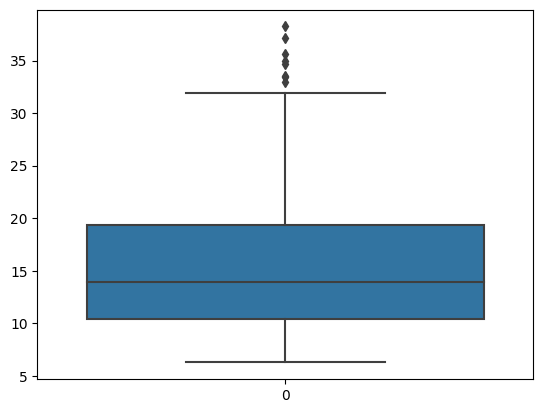

In [302]:
sns.boxplot(df.Na_to_K)

In [303]:
q1 = df.Na_to_K.quantile(.25)
q3 = df.Na_to_K.quantile(.75)

In [304]:
IQR = q3 - q1
IQR

8.9345

In [305]:
upper_limit = q3+1.5*IQR
lower_limit = q1-1.5*IQR

In [306]:
df = df[df.Na_to_K<upper_limit]

<Axes: >

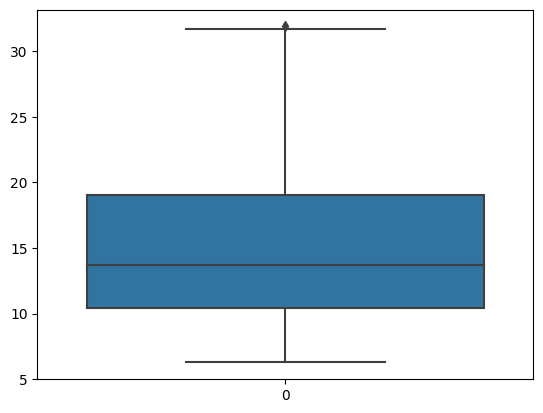

In [307]:
sns.boxplot(df.Na_to_K)

In [308]:
df.shape

(192, 6)

In [345]:
dt = pd.read_csv('/content/drug200.csv')
dt.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [346]:
X = dt.iloc[:, :-1].values
y = dt.iloc[:, -1].values

In [347]:
# sex, BP, Cholesterol, Drug columns encoding

# sex column
le = LabelEncoder()
X[:, 1] = le.fit_transform(X[:, 1])

# BP, Cholestero columns
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [2, 3])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

# Drug column
encoder = OneHotEncoder()
encoded_Y = encoder.fit(y.reshape(-1,1))
y = encoded_Y.transform(y.reshape(-1,1)).toarray()

In [348]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [349]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [357]:
import tensorflow as tf

In [358]:
# hidden layers (2)

ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=12, activation='relu'))
ann.add(tf.keras.layers.Dense(units=12, activation='relu'))
ann.add(tf.keras.layers.Dense(3,activation='softmax'))
     
# output layer
number_of_possible_outcomes =  len(set(df["Drug"]))
ann.add(tf.keras.layers.Dense(units=number_of_possible_outcomes, activation='softmax'))


In [359]:
# compile

ann.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [367]:
ann.fit(X_train, y_train, batch_size=32, epochs=100)

Epoch 1/100
5/5 [==============================] - 0s 5ms/step - loss: 0.7002 - accuracy: 0.8125
Epoch 2/100
5/5 [==============================] - 0s 5ms/step - loss: 0.6988 - accuracy: 0.8125
Epoch 3/100
5/5 [==============================] - 0s 5ms/step - loss: 0.6975 - accuracy: 0.8125
Epoch 4/100
5/5 [==============================] - 0s 5ms/step - loss: 0.6961 - accuracy: 0.8125
Epoch 5/100
5/5 [==============================] - 0s 5ms/step - loss: 0.6948 - accuracy: 0.8125
Epoch 6/100
5/5 [==============================] - 0s 6ms/step - loss: 0.6935 - accuracy: 0.8125
Epoch 7/100
5/5 [==============================] - 0s 5ms/step - loss: 0.6922 - accuracy: 0.8125
Epoch 8/100
5/5 [==============================] - 0s 7ms/step - loss: 0.6907 - accuracy: 0.8125
Epoch 9/100
5/5 [==============================] - 0s 5ms/step - loss: 0.6894 - accuracy: 0.8125
Epoch 10/100
5/5 [==============================] - 0s 5ms/step - loss: 0.6881 - accuracy: 0.8125
Epoch 11/100
5/5 [===========

In [368]:
y_pred = ann.predict(X_test)

2/2 [==============================] - 0s 5ms/step


In [369]:
y_pred

array([[0.07428118, 0.02894458, 0.07124634, 0.01996862, 0.8055593 ],
       [0.6140863 , 0.15812732, 0.10037144, 0.06555478, 0.06186018],
       [0.07227372, 0.02729039, 0.06927379, 0.01863389, 0.8125281 ],
       [0.09220608, 0.30441052, 0.0927147 , 0.42382443, 0.08684426],
       [0.8099711 , 0.07441113, 0.06358124, 0.01891154, 0.03312494],
       [0.8093399 , 0.07468251, 0.06373108, 0.01902034, 0.0332262 ],
       [0.8099706 , 0.07441134, 0.06358134, 0.01891163, 0.03312502],
       [0.07243312, 0.02736011, 0.06937337, 0.01868057, 0.81215286],
       [0.36257103, 0.2535484 , 0.12262362, 0.1694908 , 0.0917661 ],
       [0.07248221, 0.02745908, 0.06947841, 0.0187693 , 0.811811  ],
       [0.11027413, 0.30859253, 0.09756792, 0.39635247, 0.08721291],
       [0.07500782, 0.02956486, 0.07196601, 0.02047385, 0.8029875 ],
       [0.8098368 , 0.07446887, 0.06361314, 0.01893467, 0.03314649],
       [0.10497627, 0.3079411 , 0.09605987, 0.40447474, 0.08654807],
       [0.16289505, 0.25713176, 0.

In [371]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)

2/2 [==============================] - 0s 4ms/step


In [377]:
print(y_pred)

[[False False False False  True]
 [ True False False False False]
 [False False False False  True]
 [False False False False False]
 [ True False False False False]
 [ True False False False False]
 [ True False False False False]
 [False False False False  True]
 [False False False False False]
 [False False False False  True]
 [False False False False False]
 [False False False False  True]
 [ True False False False False]
 [False False False False False]
 [False False False False False]
 [ True False False False False]
 [False False False False False]
 [False False False False  True]
 [False False False False False]
 [ True False False False False]
 [False False False False False]
 [False False False False  True]
 [False False False False  True]
 [ True False False False False]
 [ True False False False False]
 [ True False False False False]
 [False False False False False]
 [False False False False  True]
 [ True False False False False]
 [False False False False  True]
 [ True Fa